In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch.cuda
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import random_split
from torchvision import datasets, transforms

import os

In [ ]:
Linear = nn.Linear
ReLU = nn.ReLU
MSELoss = nn.MSELoss
L1Loss = nn.L1Loss
Sequential = nn.Sequential
Conv2d = nn.Conv2d
ConvTranspose2d = nn.ConvTranspose2d
MaxPool2d = nn.MaxPool2d
AdaptiveAvgPool2d = nn.AdaptiveAvgPool2d
Module = nn.Module
BatchNorm2d = nn.BatchNorm2d
Sigmoid = nn.Sigmoid
Dropout = nn.Dropout

In [ ]:
num_epochs = 200
lin_loss_list = []

criterion = nn.MSELoss()
lin_optimizer = optim.SGD(lin_model.parameters(), lr=0.01, momentum=0.9)

_, val_clean, val_noisy = util.lincomb_generate_data(batch_size, B, K, functions, noise_type="gaussian")

print("STARTED TRAINING")

for epoch in range(num_epochs):
    # generate data returns the x-axis used for plotting as well as the clean and noisy data
    _, t_clean, t_noisy = util.lincomb_generate_data(batch_size, B, K, functions, noise_type="gaussian")

    # ===================forward=====================
    lin_output = lin_model(t_noisy.float())
    lin_loss = criterion(lin_output.float(), t_clean.float())
    lin_loss_list.append(lin_loss.data)

    # ===================backward====================
    lin_optimizer.zero_grad()
    lin_loss.backward()
    lin_optimizer.step()

    val_lin_loss = F.mse_loss(lin_model(val_noisy.float()), val_clean.float())

print("DONE TRAINING")

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pwd

'/mnt/disk2/samarth/denoise-nn'

In [7]:
cd ~/denoise-nn/

/mnt/disk2/samarth/denoise-nn


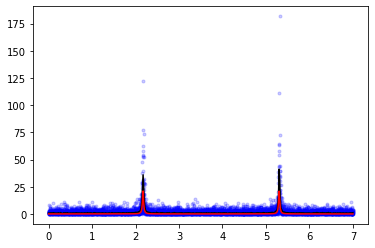

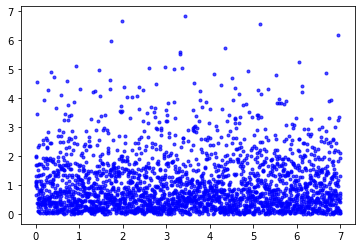

In [66]:
run create-synth.py

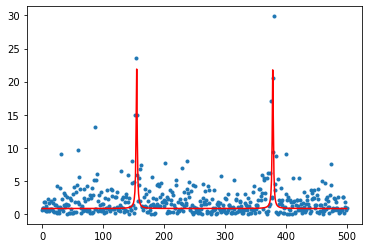

In [68]:
sig1 = sig*1
plt.figure()
n1 = np.random.randn(len(sig1))
n2 = np.random.randn(len(sig1))
plt.plot(sig1*abs(n1*n1 + n2*n2), '.')
plt.plot(sig1, 'r')
plt.show()